<a href="https://colab.research.google.com/github/lucasm-paixao/analise_dados/blob/main/analise_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de Vendas


1- Gerando o data set


In [2]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.1 MB/s eta 0:00:00


In [75]:
!pip install pandasql

2- Instalando as bibliotecas necessárias

In [77]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.express as px
from sqlalchemy import create_engine
from datetime import datetime
from pandasql import sqldf
from faker import Faker
from datetime import datetime, timedelta

In [4]:
fake = Faker('pt_BR')

# Listas auxiliares
produtos = [
    ('Arroz 5kg', 'Alimentos'),
    ('Feijão 1kg', 'Alimentos'),
    ('Óleo de Soja 900ml', 'Alimentos'),
    ('Sabonete', 'Higiene'),
    ('Detergente', 'Limpeza'),
    ('Papel Higiênico', 'Higiene'),
    ('Cerveja Lata', 'Bebidas'),
    ('Refrigerante 2L', 'Bebidas'),
    ('Café 500g', 'Alimentos'),
    ('Achocolatado 400g', 'Alimentos'),
    ('Shampoo', 'Higiene'),
    ('Desinfetante', 'Limpeza')
]

formas_pagamento = ['Cartão de Crédito', 'Cartão de Débito', 'Dinheiro', 'Pix']
estados = ['SP', 'RJ', 'MG', 'BA', 'RS', 'PR', 'SC', 'PE', 'CE', 'GO']


In [112]:
# Gerar dados
dados = []

for i in range(1000):
    produto, categoria = random.choice(produtos)
    quantidade = random.randint(1, 5)
    preco_unitario = round(random.uniform(2.5, 50), 2)
    preco_total = round(quantidade * preco_unitario, 2)

    dados.append({
        'id_venda': i + 1,
        'data_venda': fake.date_between(start_date='-6M', end_date='today'),
        'nome_cliente': fake.name(),
        'produto': produto,
        'categoria': categoria,
        'quantidade': quantidade,
        'preco_unitario': preco_unitario,
        'preco_total': preco_total,
        'forma_pagamento': random.choice(formas_pagamento),
        'estado': random.choice(estados)
    })

# Criar DataFrame
dados = pd.DataFrame(dados)

# Salvar como CSV
dados.to_csv('vendas_mercado.csv', index=False, sep=';', encoding='utf-8-sig')

# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Definir o caminho para salvar o arquivo no Google Drive
caminho_arquivo = '/content/drive/MyDrive/portfolio_dados/arquivo.csv'

# Salvar como CSV no Google Drive
dados.to_csv(caminho_arquivo, index=False, sep=';', encoding='utf-8-sig')

print(f'Arquivo salvo em: {caminho_arquivo}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Arquivo salvo em: /content/drive/MyDrive/portfolio_dados/arquivo.csv


In [113]:
dados.head(10)

,id_venda,data_venda,nome_cliente,produto,categoria,quantidade,preco_unitario,preco_total,forma_pagamento,estado
0,1,2025-02-19,Sr. Luigi Fogaça,Feijão 1kg,Alimentos,5,3.35,16.75,Cartão de Débito,PE
1,2,2024-12-15,Natália Cardoso,Café 500g,Alimentos,5,7.82,39.10,Pix,PE
2,3,2025-03-26,Evelyn Pires,Papel Higiênico,Higiene,2,5.04,10.08,Pix,BA
3,4,2025-03-06,Gael Henrique Garcia,Cerveja Lata,Bebidas,3,35.41,106.23,Cartão de Crédito,SC
4,5,2024-11-28,Davi Lucca Nunes,Cerveja Lata,Bebidas,5,5.13,25.65,Cartão de Débito,MG
5,6,2024-12-20,Thomas Araújo,Detergente,Limpeza,4,45.21,180.84,Pix,SP
6,7,2024-11-16,Eloá Pires,Cerveja Lata,Bebidas,2,43.53,87.06,Cartão de Crédito,MG
7,8,2025-03-11,Igor Carvalho,Papel Higiênico,Higiene,1,33.57,33.57,Cartão de Crédito,SP
8,9,2024-12-07,Maria Luiza Nunes,Achocolatado 400g,Alimentos,1,48.80,48.80,Dinheiro,SC
9,10,2024-11-13,Caroline Sampaio,Café 500g,Alimentos,4,29.68,118.72,Cartão de Débito,RS


In [10]:
dados.describe()

,id_venda,quantidade,preco_unitario,preco_total
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,3.007000,26.488150,79.086070
std,288.819436,1.431433,13.910075,59.814247
min,1.000000,1.000000,2.510000,2.590000
25%,250.750000,2.000000,14.872500,31.800000
50%,500.500000,3.000000,26.380000,62.800000
75%,750.250000,4.000000,38.720000,114.272500
max,1000.000000,5.000000,49.940000,249.100000


3- Transformando os dados

In [64]:
# Verificar a quantidade de valores nulos
dados.isnull().sum()

# Identificar a porcentagem de valores nulos em cada coluna
(dados.isnull().sum() / len(dados)) * 100

,0
id_venda,0.0
data_venda,0.0
nome_cliente,0.0
produto,0.0
categoria,0.0
quantidade,0.0
preco_unitario,0.0
preco_total,0.0
forma_pagamento,0.0
estado,0.0


In [66]:
dados = dados.dropna()  # Remove qualquer linha com valores nulos, caso haja

In [ ]:
dados['coluna'] = dados['coluna'].fillna(dados['coluna'].mean())  # Preencher com a média, caso houvessem valores nulos

In [ ]:
dados['coluna'] = dados['coluna'].fillna(0)  # Preencher com 0

In [69]:
# Converter uma coluna para o tipo datetime
dados['data_venda'] = pd.to_datetime(dados['data_venda'], format='%Y-%m-%d')

# Converter uma coluna para numérico
dados['preco_total'] = pd.to_numeric(dados['preco_total'], errors='coerce')


In [70]:
# Remover duplicatas
dados = dados.drop_duplicates()

# Remover duplicatas em colunas específicas
dados = dados.drop_duplicates(subset=['categoria', 'data_venda'])

4- Fazendo consultas com SQL

In [14]:
# Função auxiliar para rodar SQL em cima do DataFrame
pysqldf = lambda q: sqldf(q, globals())

In [21]:
dados['forma_pagamento'].unique()

array(['Cartão de Débito', 'Cartão de Crédito', 'Pix', 'Dinheiro'],
      dtype=object)

In [15]:
query = """
SELECT COUNT(*) AS total_vendas,
       SUM(preco_total) AS receita_total
FROM dados
"""
pysqldf(query)

,total_vendas,receita_total
0,1000,79086.07


In [16]:
query = """
SELECT COUNT(*) AS vendas_credito,
       SUM(preco_total) AS receita_credito
FROM dados
WHERE forma_pagamento = 'Cartão de Crédito'
"""
pysqldf(query)

,vendas_credito,receita_credito
0,247,20624.85


In [17]:
query = """
SELECT COUNT(*) AS vendas_pix,
       SUM(preco_total) AS receita_pix
FROM dados
WHERE forma_pagamento = 'Pix'
"""
pysqldf(query)

,vendas_pix,receita_pix
0,253,18036.51


In [18]:
query = """
SELECT COUNT(*) AS vendas_debito,
       SUM(preco_total) AS receita_debito
FROM dados
WHERE forma_pagamento = 'Cartão de Débito'
"""
pysqldf(query)

,vendas_debito,receita_debito
0,261,21254.1


In [19]:
query = """
SELECT COUNT(*) AS vendas_dinheiro,
       SUM(preco_total) AS receita_dinheiro
FROM dados
WHERE forma_pagamento = 'Dinheiro'
"""
pysqldf(query)

,vendas_dinheiro,receita_dinheiro
0,239,19170.61


In [23]:
query = """
SELECT categoria,
       COUNT(*) AS total_vendas,
       ROUND(SUM(preco_total), 2) AS receita
FROM dados
GROUP BY categoria
ORDER BY receita DESC
"""
pysqldf(query)

,categoria,total_vendas,receita
0,Alimentos,401,31469.73
1,Higiene,265,19675.85
2,Bebidas,175,15565.44
3,Limpeza,159,12375.05


In [27]:
query = """
SELECT forma_pagamento,
       ROUND(AVG(preco_total), 2) AS ticket_medio
FROM dados
GROUP BY forma_pagamento
ORDER BY ticket_medio DESC
"""
pysqldf(query)

,forma_pagamento,ticket_medio
0,Cartão de Crédito,83.50
1,Cartão de Débito,81.43
2,Dinheiro,80.21
3,Pix,71.29


In [26]:
query = """
SELECT estado,
       COUNT(*) AS qtd_vendas
FROM dados
GROUP BY estado
ORDER BY qtd_vendas DESC
"""
pysqldf(query)

,estado,qtd_vendas
0,SC,115
1,MG,113
2,SP,105
3,PR,102
4,CE,102
5,PE,99
6,GO,99
7,BA,97
8,RS,91
9,RJ,77


5- Gerando gráficos

<ipython-input-36-4127850f12e1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_categoria, x='categoria', y='receita', palette='YlGnBu')


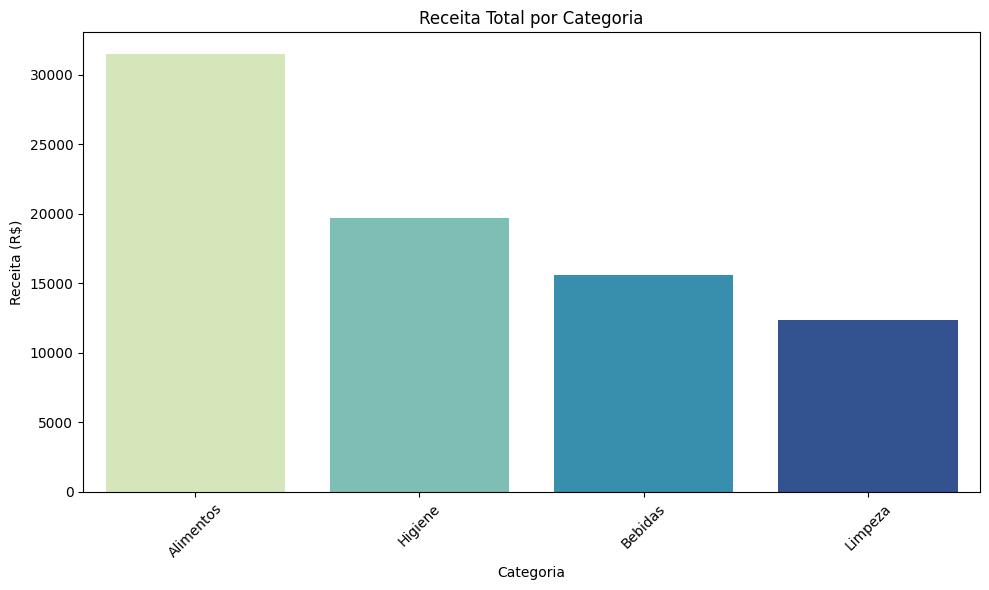

In [36]:
query = """
SELECT categoria,
       ROUND(SUM(preco_total), 2) AS receita
FROM dados
GROUP BY categoria
ORDER BY receita DESC
"""

df_categoria = pysqldf(query)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_categoria, x='categoria', y='receita', palette='YlGnBu')
plt.title('Receita Total por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Receita (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-57-35fda5d9d8c9>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




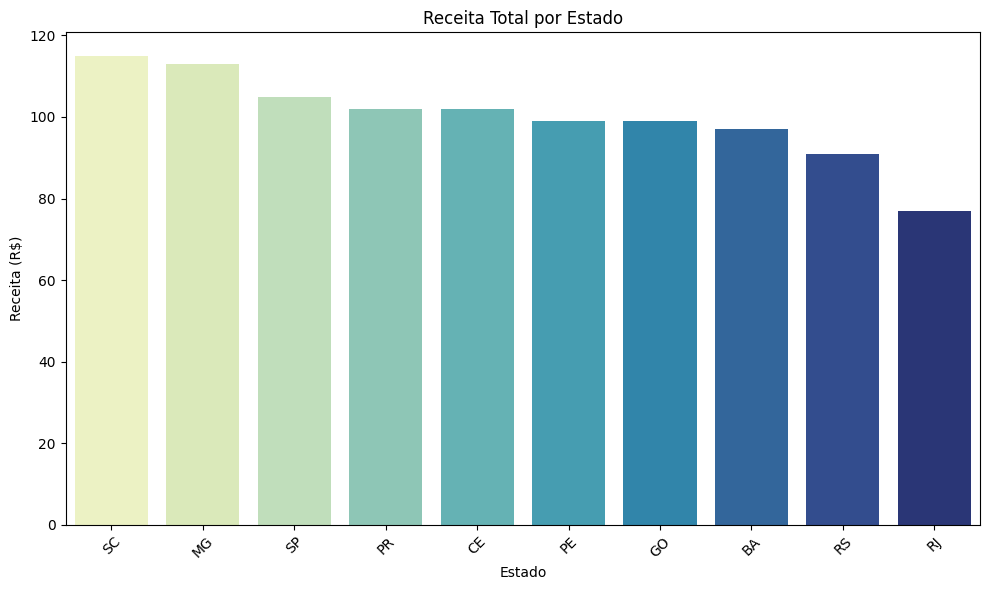

In [57]:
query = """
SELECT estado,
       COUNT(*) AS receita
FROM dados
GROUP BY estado
ORDER BY receita DESC
"""

df_receita_por_estado = pysqldf(query)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_receita_por_estado, x='estado', y='receita', palette='YlGnBu')
plt.title('Receita Total por Estado')
plt.xlabel('Estado')
plt.ylabel('Receita (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

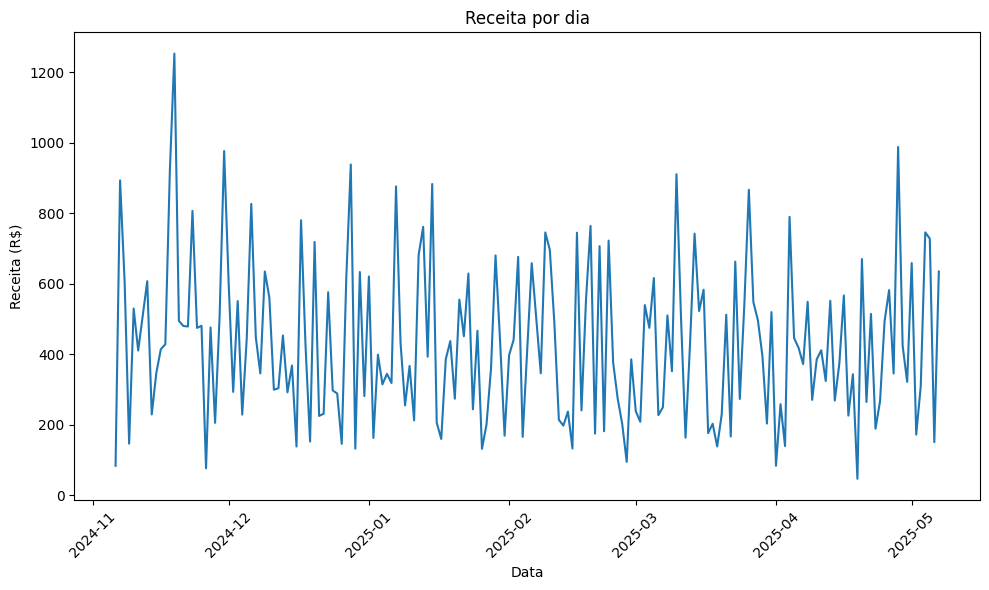

In [40]:
query = '''
SELECT data_venda,
       ROUND(SUM(preco_total), 2) AS faturamento
FROM dados
GROUP BY data_venda
ORDER BY data_venda
'''

df_receita_diaria = pysqldf(query)
df_receita_diaria['data_venda'] = pd.to_datetime(df_receita_diaria['data_venda'])


plt.figure(figsize=(10, 6))
sns.lineplot(data=df_receita_diaria, x='data_venda', y='faturamento')
plt.title('Receita por dia')
plt.xlabel('Data')
plt.ylabel('Receita (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

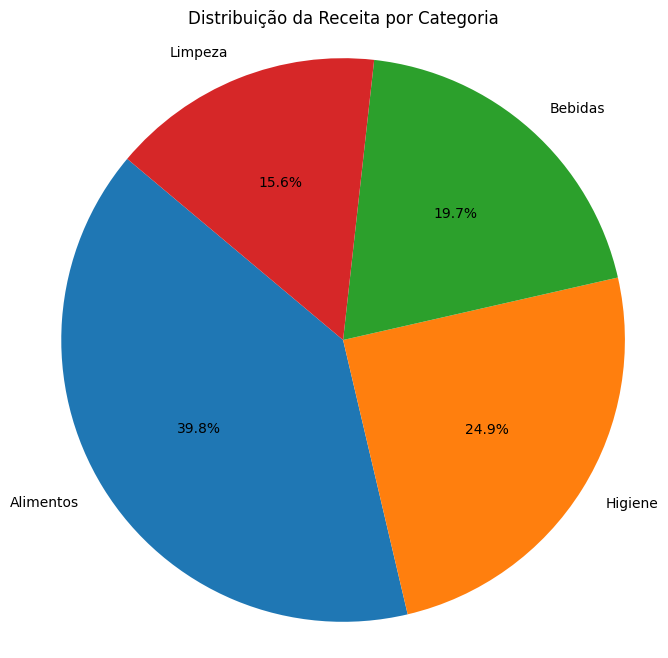

In [42]:
query = '''
SELECT categoria,
       ROUND(SUM(preco_total), 2) AS receita
FROM dados
GROUP BY categoria
ORDER BY receita DESC
'''

df_receita_por_categoria = pysqldf(query)

plt.figure(figsize=(8, 8))
plt.pie(df_receita_por_categoria['receita'],
        labels=df_receita_por_categoria['categoria'],
        autopct='%1.1f%%',
        startangle=140)

plt.title('Distribuição da Receita por Categoria')
plt.axis('equal')  # Deixa o gráfico circular
plt.show()

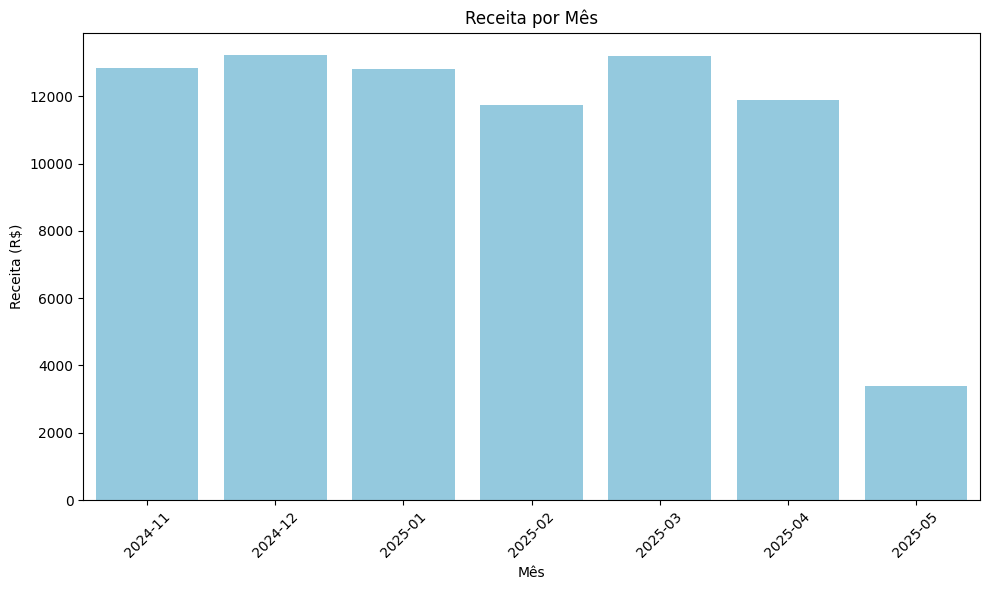

In [43]:
df_receita_diaria['data_venda'] = pd.to_datetime(df_receita_diaria['data_venda'])
df_receita_diaria['mes'] = df_receita_diaria['data_venda'].dt.to_period('M').astype(str)

df_receita_mensal = df_receita_diaria.groupby('mes')['faturamento'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_receita_mensal, x='mes', y='faturamento', color='skyblue')

plt.title('Receita por Mês')
plt.xlabel('Mês')
plt.ylabel('Receita (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6- Usando gráficos dinâmicos


In [53]:
fig = px.bar(df_categoria,
             x='categoria',
             y='receita',
             title='Receita Total por Categoria',
             labels={'categoria': 'Categoria', 'receita': 'Receita (R$)'},
             color='receita',
             color_continuous_scale='YlGnBu')

fig.update_layout(
    xaxis_title='Categoria',
    yaxis_title='Receita (R$)',
    xaxis_tickangle=45
)

fig.show()


In [61]:
fig = px.bar(df_receita_mensal,
             x='mes',
             y='faturamento',
             title='Receita Total por Mês',
             labels={'mes': 'Mês', 'faturamento': 'Receita (R$)'},
             color='faturamento',
             color_continuous_scale='YlGnBu')

fig.update_layout(
    xaxis_title='Mês',
    yaxis_title='Receita (R$)',
    xaxis_tickangle=45
)

fig.show()